In [38]:
import io_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import random
import sklearn
import re, seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [39]:
cols = [
    # 'Date',
    'BZ_North',
    'Velocity_Latitude_n/s',
    'Velocity_Latitude_e/w',
    'Magnetometer_Magnitude',
    # 'Magnetometer_Theta',
    # 'Magnetometer_Phi',
    # 'Magnetometer_North',
    # 'Magnetometer_East',
    # 'Magnetometer_Z',
    # 'Labels'
    ]

In [40]:
X = pd.read_csv('ClusterData.csv',usecols=cols)
# X['Date'] = mdates.date2num(X['Date'])
X = X.dropna()

In [41]:
# sns.scatterplot(x=X['BZ_North'],y=X['Velocity_Latitude_n/s'])
# sns.scatterplot(x=X['BZ_North'],y=X['Velocity_Latitude_e/w'])
# sns.scatterplot(x=X['BZ_North'],y=X['Velocity_Latitude_e/w'])


In [42]:
X.to_csv('d.csv')

In [43]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X.values)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [44]:
cols2=[
    'BZ_North',
    'Velocity_Latitude_n/s',
    'Velocity_Latitude_e/w',
    'Magnetometer_Magnitude'
]
L = X[cols2].values
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms = 
ms.fit(X)

MeanShift(bandwidth=654.4879075736019, bin_seeding=True)

In [45]:
# from sklearn import metrics
# from sklearn.cluster import DBSCAN

# ms = DBSCAN(eps=0.3, min_samples=10).fit(X)
# n_noise_ = list(labels).count(-1)

# from sklearn.cluster import AffinityPropagation

# af = AffinityPropagation(preference=-50, random_state=0).fit(L)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_

In [46]:
labels = ms.labels_
# cluster_centers = ms.cluster_centers_
# print("Estimated number of noise points: %d" % n_noise_)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [47]:
# print(L)
# print(cluster_centers)
# print(labels)
# print(len(labels))

<Axes: xlabel='Magnetometer_Magnitude', ylabel='BZ_North'>

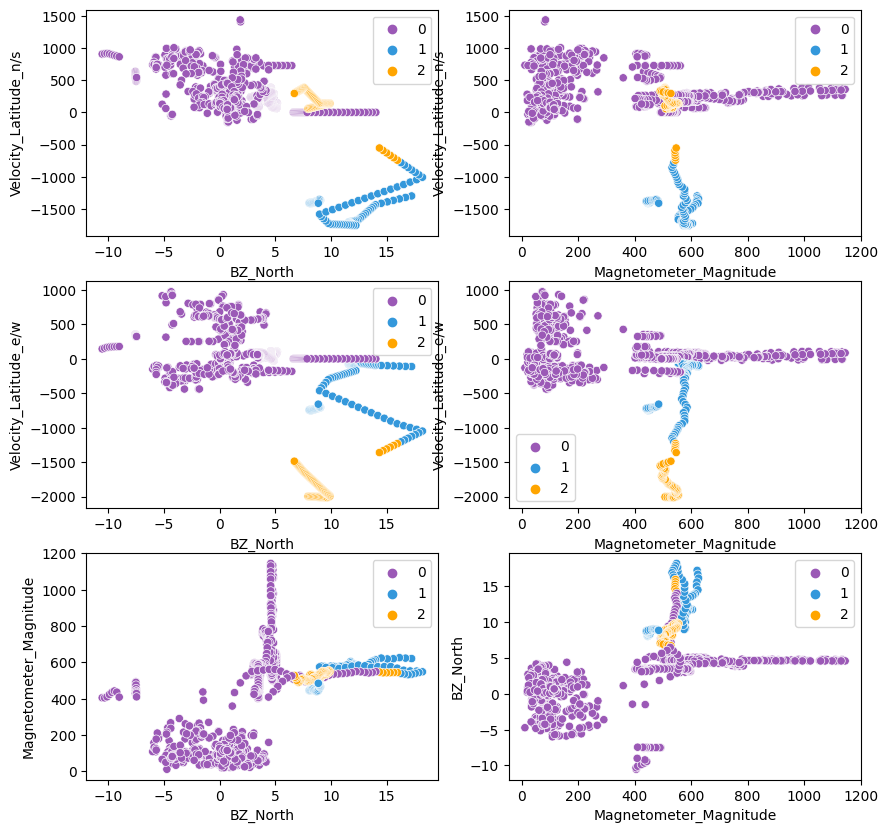

In [48]:
fig, axarr = plt.subplots(3,2,figsize=(10,10))
flatui = ["#9b59b6", "#3498db", "orange"]

sns.scatterplot(ax=axarr[0][0],data=X,x='BZ_North',y='Velocity_Latitude_n/s',hue=labels,palette=flatui)
sns.scatterplot(ax=axarr[1][0],data=X,x='BZ_North',y='Velocity_Latitude_e/w',hue=labels,palette=flatui)
sns.scatterplot(ax=axarr[2][0],data=X,x='BZ_North',y='Magnetometer_Magnitude',hue=labels,palette=flatui)

sns.scatterplot(ax=axarr[0][1],data=X,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue=labels,palette=flatui)
sns.scatterplot(ax=axarr[1][1],data=X,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue=labels,palette=flatui)
sns.scatterplot(ax=axarr[2][1],data=X,x='Magnetometer_Magnitude',y='BZ_North',hue=labels,palette=flatui)


# sns.scatterplot(ax=axarr[0][2],data=X,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue=labels)
# sns.scatterplot(ax=axarr[1][2],data=X,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue=labels)
# sns.scatterplot(ax=axarr[2][2],data=X,x='Magnetometer_Magnitude',y='BZ_North',hue=labels)

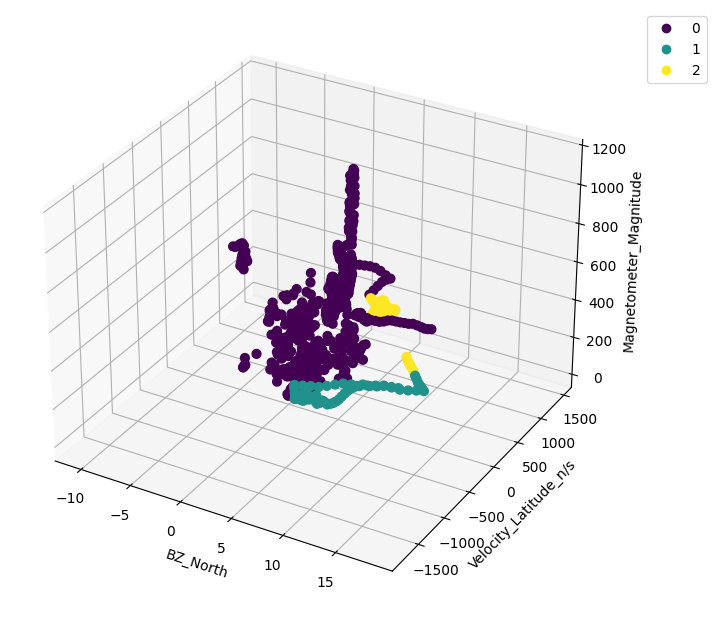

In [49]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(L[:,0],L[:,1],L[:,3], s=40, c=labels, marker='o', alpha=1)
ax.set_xlabel(cols2[0])
ax.set_ylabel(cols2[1])
ax.set_zlabel(cols2[3])

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# plt.savefig("scatter_hue", bbox_inches='tight')

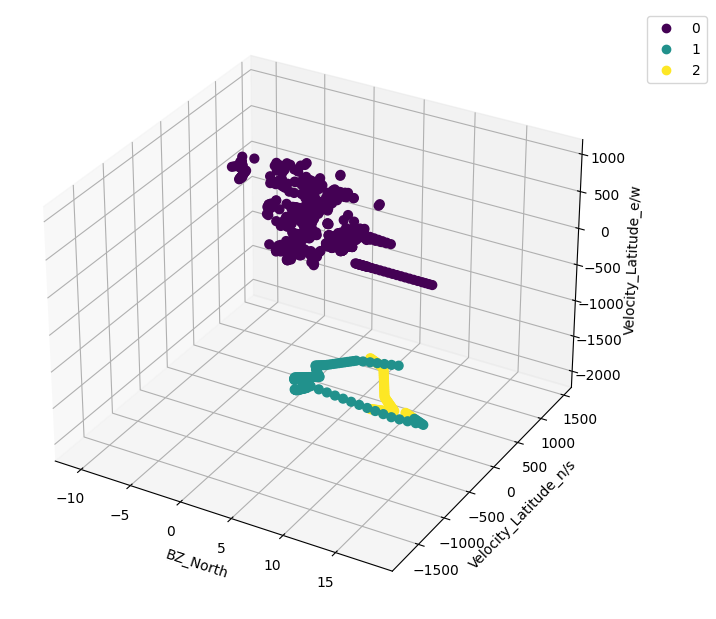

In [50]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(L[:,0],L[:,1],L[:,2], s=40, c=labels, marker='o', alpha=1)
ax.set_xlabel(cols2[0])
ax.set_ylabel(cols2[1])
ax.set_zlabel(cols2[2])

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

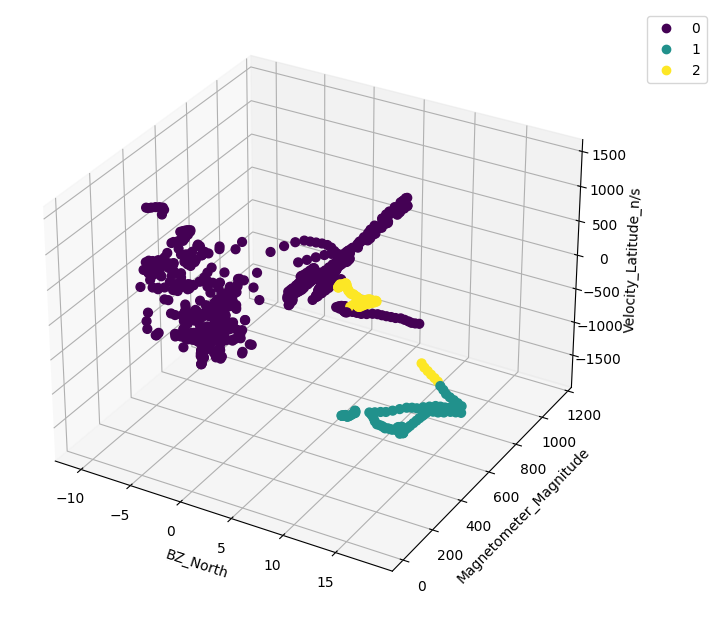

In [51]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(L[:,0],L[:,3],L[:,1], s=40, c=labels, marker='o', alpha=1)
ax.set_xlabel(cols2[0])
ax.set_ylabel(cols2[3])
ax.set_zlabel(cols2[1])

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

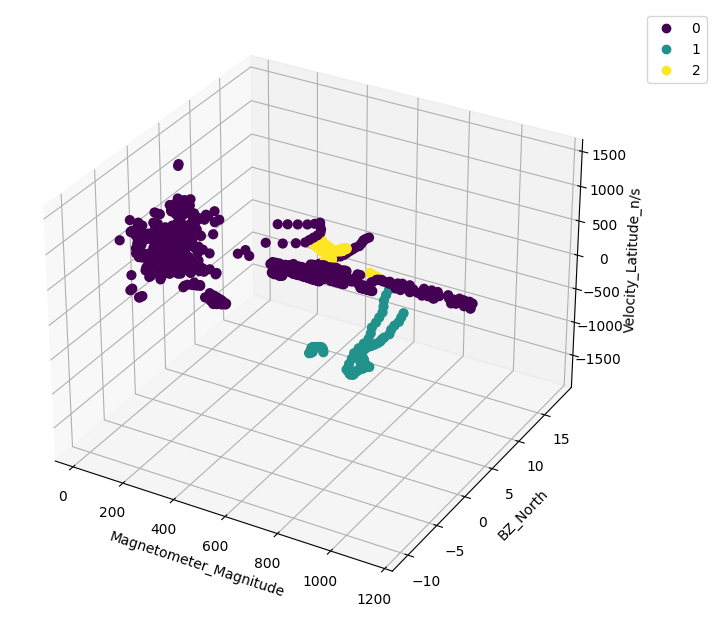

In [52]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(L[:,3],L[:,0], L[:,1], s=40, c=labels, marker='o', alpha=1)
ax.set_xlabel(cols2[3])
ax.set_ylabel(cols2[0])
ax.set_zlabel(cols2[1])

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [53]:
X = pd.read_csv('ClusterDataMS.csv')

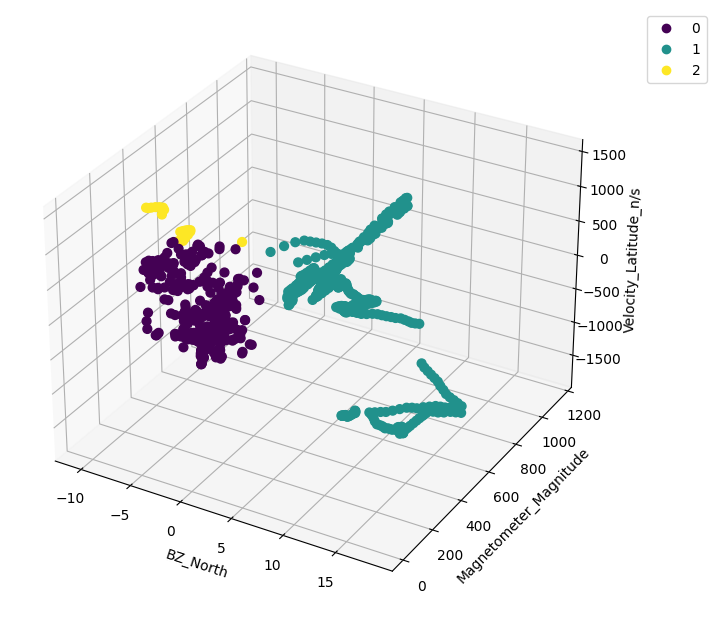

In [54]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(X['BZ_North'],X['Magnetometer_Magnitude'], X['Velocity_Latitude_n/s'], s=40, c=X['Labels'], marker='o', alpha=1)
ax.set_xlabel('BZ_North')
ax.set_ylabel('Magnetometer_Magnitude')
ax.set_zlabel('Velocity_Latitude_n/s')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

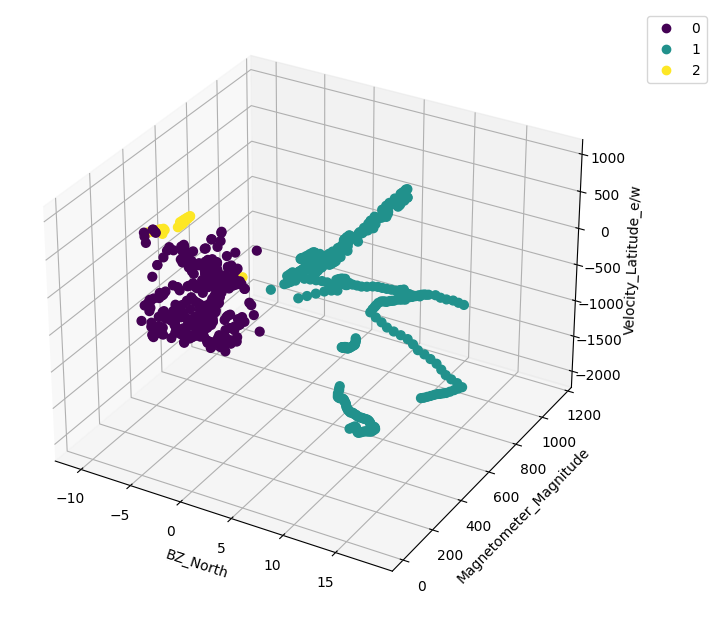

In [55]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(X['BZ_North'],X['Magnetometer_Magnitude'], X['Velocity_Latitude_e/w'], s=40, c=X['Labels'], marker='o', alpha=1)
ax.set_xlabel('BZ_North')
ax.set_ylabel('Magnetometer_Magnitude')
ax.set_zlabel('Velocity_Latitude_e/w')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

Access AOSWifi on campus in building
AOS VPN different from Campus cisco vpn
luna.atmos.ucla.edu
login with aos id and password
vpn2.atmos.ucla.edu

SSH into any servers connected

data plutus mounted on emphasis server
/data/plutus/AMISR/RISR-N/

Go through all events and see if theyre are any events we missed

Write one based on electrong temperature
Learn what sean has done
Meet with sean
Apply what he's done with pfisr data on risr data

Magnetic Local TIME is a MUST
BX, BY, Solar Wind Speed would be interesting

High Dimensional Clustering should work in nd

150 mv/m is 3000 m/s roughly
18-19 time on UT

copy magnetometer data onto the server

mailto:ATMOSSupport@em.ucla.edu
email for aos id
ask

<Axes: xlabel='Magnetometer_Magnitude', ylabel='BZ_North'>

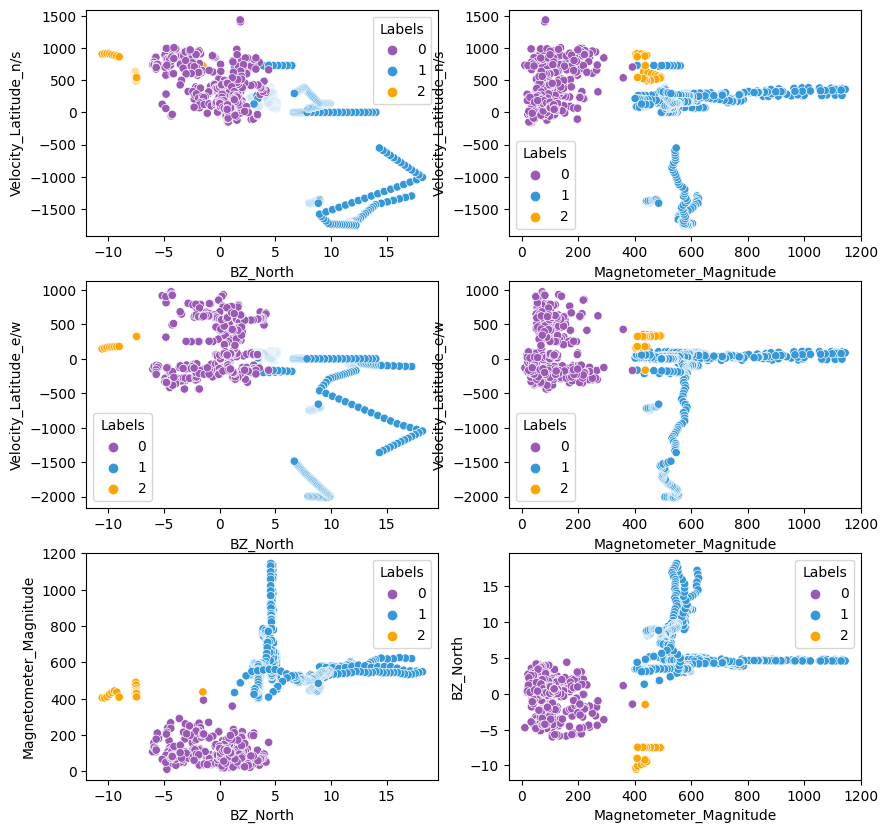

In [57]:
fig, axarr = plt.subplots(3,2,figsize=(10,10))
flatui = ["#9b59b6", "#3498db", "orange"]

sns.scatterplot(ax=axarr[0][0],data=X,x='BZ_North',y='Velocity_Latitude_n/s',hue=X['Labels'],palette=flatui)
sns.scatterplot(ax=axarr[1][0],data=X,x='BZ_North',y='Velocity_Latitude_e/w',hue=X['Labels'],palette=flatui)
sns.scatterplot(ax=axarr[2][0],data=X,x='BZ_North',y='Magnetometer_Magnitude',hue=X['Labels'],palette=flatui)

sns.scatterplot(ax=axarr[0][1],data=X,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue=X['Labels'],palette=flatui)
sns.scatterplot(ax=axarr[1][1],data=X,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue=X['Labels'],palette=flatui)
sns.scatterplot(ax=axarr[2][1],data=X,x='Magnetometer_Magnitude',y='BZ_North',hue=X['Labels'],palette=flatui)

Other solar wind params BY,BX,MLT
Run cluster
2014 CLauer event missing

In [71]:
from scipy.stats import ttest_ind
res = []

Normal = X[X['Labels'] == 0]
FB_one = X[X['Labels'] == 1]
FB_two = X[X['Labels'] == 2]

print(Normal.columns)
print(ttest_ind(Normal, FB_one))

s,p = ttest_ind(Normal, FB_one)
res.append(p)

s,p = ttest_ind(Normal, FB_two)
res.append(p)

s,p = ttest_ind(FB_one, FB_two)
res.append(p)

df = pd.DataFrame(res)
# df.to_csv('ClusterTtest.csv)

Index(['Unnamed: 0', 'BZ_North', 'Magnetometer_Magnitude',
       'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w', 'Labels'],
      dtype='object')
Ttest_indResult(statistic=array([ 18.78316713, -32.88046628, -60.63886507,  13.8746223 ,
        11.41588466,         -inf]), pvalue=array([1.01484728e-066, 1.23214132e-156, 5.29638372e-321, 7.92076144e-040,
       2.70410935e-028, 0.00000000e+000]))


/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_99453/3159367307.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(ttest_ind(Normal, FB_one))
/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_99453/3159367307.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s,p = ttest_ind(Normal, FB_one)
/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_99453/3159367307.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s,p = ttest_ind(Normal, FB_two)
/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_99453/3159367307.py:17: RuntimeWarning: Precision loss occurred in moment cal

[Text(0.5, 1.0, 'P Values from T-tests')]

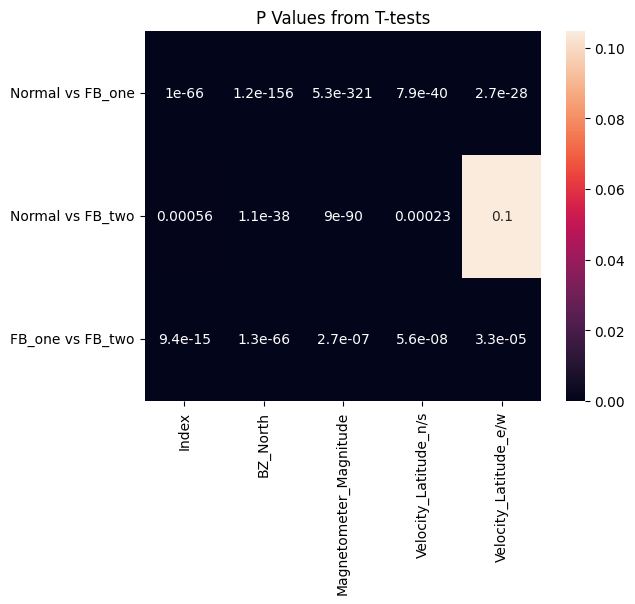

In [79]:
df = pd.read_csv('ClusterTtest.csv')#.drop(columns='Category')
yl = df['Category']
df = df.drop(columns='Category')
sns.heatmap(df,annot=True,yticklabels=yl).set(title="P Values from T-tests")

In [61]:
print(X['Labels' == 0])

KeyError: False